In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode

In [102]:
iris = sns.load_dataset('iris')

In [111]:
iris = iris.sample(frac=1)

In [112]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [113]:
iris.species = pd.Categorical(iris.species)

In [114]:
X = iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris.species.values

In [115]:
ns = int(3/4 * iris.shape[0])
ns

112

In [116]:
X_train = X[:ns, :]
y_train = y[:ns]
X_test = X[ns:, :]
y_test = y[ns:]

In [117]:
y_pred = []
for i in range(X_test.shape[0]):
    k = 3
    dists = (np.abs(X_train - X_test[i, :])).sum(axis=1)
    inds = np.argsort(dists)
    nearests = y_train[inds[:k]]
    pred = mode(nearests)[0][0]
    y_pred.append(pred)
    

In [118]:
(y_pred == y_test).mean()

0.9473684210526315

In [120]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [123]:
import matplotlib.pyplot as plt

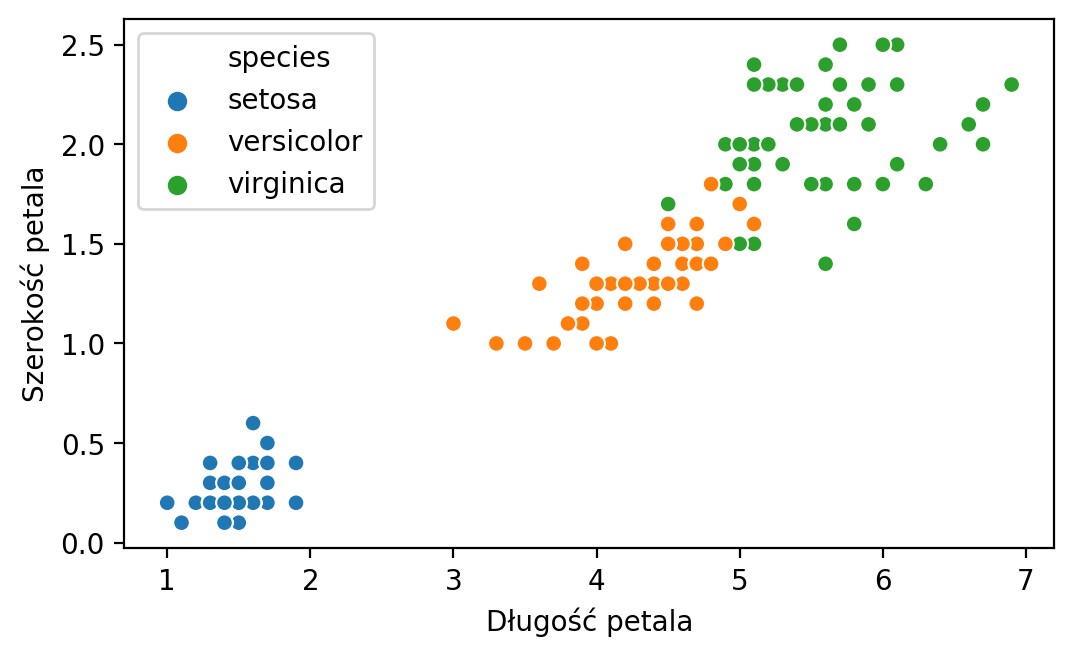

In [131]:
plt.figure(figsize=(6, 3.5), dpi = 200)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.xlabel("Długość petala")
plt.ylabel("Szerokość petala")
plt.show()

# Sklearn

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
# clf = KNeighborsClassifier(n_neighbors = 3)
clf = RandomForestClassifier()

In [186]:
X = iris.drop('species', axis=1)
y = iris.species

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [188]:
clf.fit(X_train, y_train)

/home/pitrosk/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
y_pred = clf.predict(X_test)

In [190]:
(y_pred == y_test).mean()

0.9473684210526315

In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
cross_val_score(clf, X, y, cv=10)

array([0.86666667, 1.        , 0.93333333, 0.86666667, 0.93333333,
       1.        , 0.93333333, 0.86666667, 0.93333333, 1.        ])

In [193]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : str or callable, optional (default = 'uniform')
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the sam